In [1]:
import os
import json
from tqdm import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
CROP_SIZE = 50


In [3]:
path = 'C:/Users/Febrin/Desktop/recording_car_tub'
IMAGES_PATHS = os.listdir(path)
JSONS = []

for p in tqdm(IMAGES_PATHS, desc='Loading json data...'):
    if p.find('.json') != -1 and p.find('meta') == -1:
        with open(path + '/' + p) as f:
            JSONS.append(json.load(f))

Loading json data...: 100%|█████████████████████████████████████████████████| 115971/115971 [00:06<00:00, 16654.01it/s]


In [6]:
DATA = []

for json in tqdm(JSONS, desc='Creating training data...', position=0, leave=True):
    img =  Image.open(path + '/'+ json['image_array']).convert('L')
    img = np.array(img)
    img = img[-CROP_SIZE:, :]
    img = cv2.Canny(img, 300, 400)
    
    features = (json['user_angle'], json['user_throttle'], json['distance'], json['timestamp'])
    DATA.append((img, features))

Creating training data...: 100%|████████████████████████████████████████████████| 57985/57985 [01:55<00:00, 503.68it/s]


In [7]:
DATA[0]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (0.338, 0.12421052631578948, 10348, '2020-05-30 14:42:55.994782'))

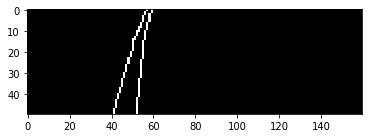

In [8]:
plt.imshow(DATA[0][0], cmap='gray')

In [9]:
np.save('training_data.npy', DATA)

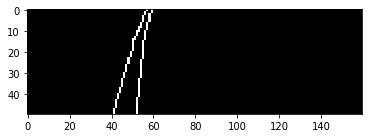

In [13]:
from IPython.display import clear_output

for x, y in DATA:
    clear_output(True)
    plt.imshow(x, cmap='gray')
    plt.show()
#     break
    